Количество колоний: 45


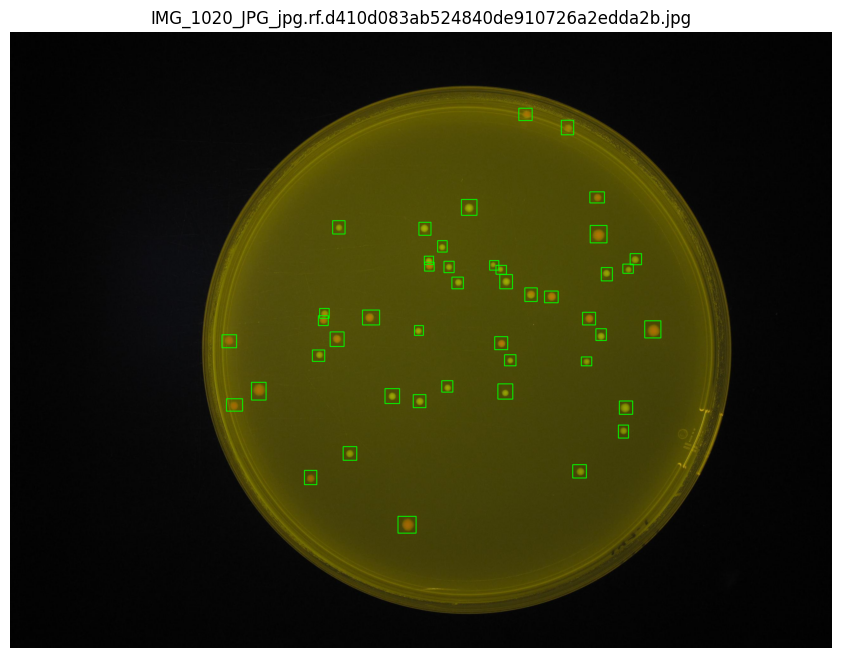

Количество колоний: 48


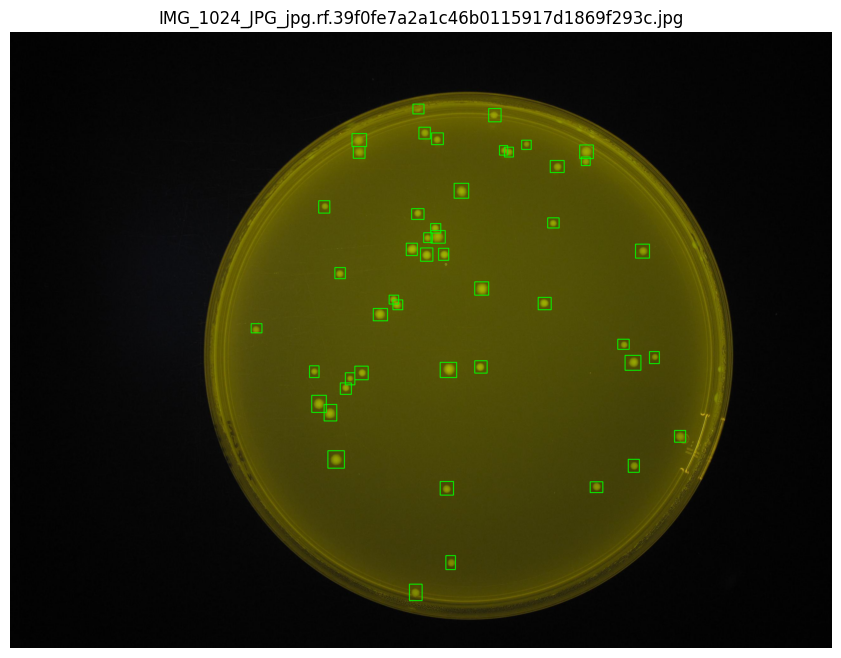

Количество колоний: 47


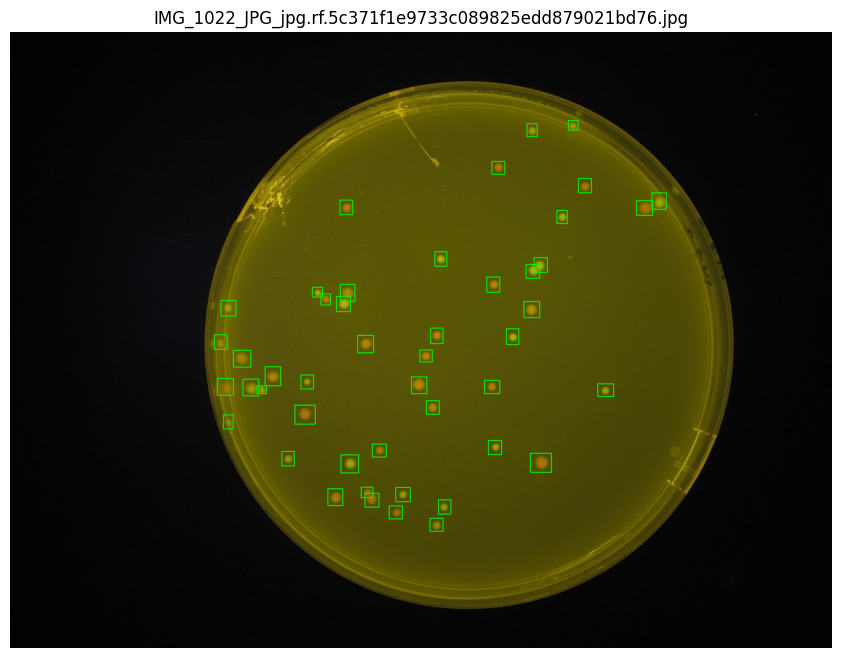

In [32]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Пути к данным
IMAGE_DIR = 'Dataset_2/test/images'             # Папка с изображениями
LABEL_DIR = 'Dataset_2/test/labels'           # Папка с YOLO-аннотациями .txt

# Получаем список всех изображений
image_files = [f for f in os.listdir(IMAGE_DIR) if f.endswith(('.jpg', '.png'))]



# Выбираем 3 случайных изображения
for image_file in random.sample(image_files, 3):
    image_path = os.path.join(IMAGE_DIR, image_file)
    label_path = os.path.join(LABEL_DIR, os.path.splitext(image_file)[0] + '.txt')

    img = cv2.imread(image_path)
    if img is None:
        print(f"Не удалось загрузить: {image_file}")
        continue

    h, w = img.shape[:2]

    # Читаем аннотации YOLO
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            annotations = f.readlines()
    else:
        annotations = []
    
    # Подсчет кол-ва колоний
    colony_len = len(annotations)
    print(f'Количество колоний: {colony_len}')
    
    # Рисуем боксы
    for ann in annotations:
        parts = ann.strip().split()

        if len(parts) != 5:
            continue
        cls_id, x_center, y_center, box_w, box_h = map(float, parts)
        cls_id = int(cls_id)

        # Преобразование нормализованных координат в пиксели
        x1 = int((x_center - box_w / 2) * w)
        y1 = int((y_center - box_h / 2) * h)
        x2 = int((x_center + box_w / 2) * w)
        y2 = int((y_center + box_h / 2) * h)

        # Нарисовать прямоугольник и класс
        color = (0, 255, 0)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    # Отображаем в ноутбуке
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(image_file)
    plt.axis('off')
    plt.show()
